<a href="https://colab.research.google.com/github/Sidd1609/Regression_Analysis/blob/master/Regrssion_analysis%26plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [9]:
uploaded=files.upload()

In [0]:
uploaded

In [0]:
import pandas as pd 
import sklearn as skl
import numpy as np

#Train_ds=[]
#Test ds=[]

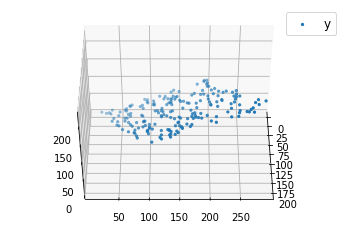

In [10]:
import numpy as np 
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
  
def generate_dataset(n): 
    x = [] 
    y = [] 
    random_x1 = np.random.rand() 
    random_x2 = np.random.rand() 
    for i in range(n): 
        x1 = i 
        x2 = i/2 + np.random.rand()*n 
        x.append([1, x1, x2]) 
        y.append(random_x1 * x1 + random_x2 * x2 + 1) 
    return np.array(x), np.array(y) 
  
x, y = generate_dataset(200) 
  
mpl.rcParams['legend.fontsize'] = 12
  
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 
  
plt.show() 

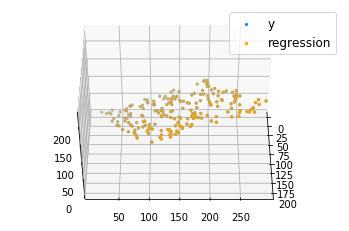

In [11]:
def mse(coef, x, y): 
    return np.mean((np.dot(x, coef) - y)**2)/2
  
def gradients(coef, x, y): 
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1) 
  
def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999, epsilon = 1e-8): 
    prev_error = 0
    m_coef = np.zeros(coef.shape) 
    v_coef = np.zeros(coef.shape) 
    moment_m_coef = np.zeros(coef.shape) 
    moment_v_coef = np.zeros(coef.shape) 
    t = 0
  
    while True: 
        error = mse(coef, x, y) 
        if abs(error - prev_error) <= epsilon: 
            break
        prev_error = error 
        grad = gradients(coef, x, y) 
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad 
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t) 
        moment_v_coef = v_coef / (1-b2**t) 
  
        delta = ((lr / moment_v_coef**0.5 + 1e-8) * 
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t))) 
  
        coef = np.subtract(coef, delta) 
    return coef 
  
coef = np.array([0, 0, 0]) 
c = multilinear_regression(coef, x, y, 1e-1) 
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', 
                s = 5, color ="dodgerblue") 
  
ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2], 
                    label ='regression', s = 5, color ="orange") 
  
ax.view_init(45, 0) 
ax.legend() 
plt.show() 

In [0]:
import cv2    
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')  
cap = cv2.VideoCapture(0) 
while 1:  
    ret, img = cap.read()  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
  
    for (x,y,w,h) in faces:   
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)  
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = img[y:y+h, x:x+w] 
        eyes = eye_cascade.detectMultiScale(roi_gray)  
        for (ex,ey,ew,eh) in eyes: 
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2) 
    cv2.imshow('img',img) 
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
cap.release() 
cv2.destroyAllWindows()  